# EDA Movie

## Project
Several sites allow you to post a comment or opinion about a product, place, or event. Think of Facebook, Instagram, Youtube, or Reddit. However, on not all of these sites, you can see at a glance how many of these comments are written with a positive or negative mindset. 

For many people or companies, it is useful to know what percentage of the reactions are positive or negative. You can't always tell this by looking at a Like system. The main question you should be able to answer with the help of this project is; Is a piece of text positive or negative?

## Movie Dataset

This is a dataset with a lot of reviews about movies. It comes from kaggle.
  
source: https://www.kaggle.com/nltkdata/movie-review

## Document goal
In this paper, I want to gain more insight into the Movie dataset. And estimate if it is useful for achieving my project goal. 

First We will start with importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#set decimal point
pd.options.display.float_format = "{:.5f}".format

Let's start by loading the data set 

In [2]:
df = pd.read_csv('data/raw/movie_review.csv')

Now that we have a data frame let's start looking at the data 

In [3]:
df

fold_id cv_tag  html_id  sent_id  \
0            0  cv000    29590        0   
1            0  cv000    29590        1   
2            0  cv000    29590        2   
3            0  cv000    29590        3   
4            0  cv000    29590        4   
...        ...    ...      ...      ...   
64715        9  cv999    14636       20   
64716        9  cv999    14636       21   
64717        9  cv999    14636       22   
64718        9  cv999    14636       23   
64719        9  cv999    14636       24   

                                                    text  tag  
0      films adapted from comic books have had plenty...  pos  
1      for starters , it was created by alan moore ( ...  pos  
2      to say moore and campbell thoroughly researche...  pos  
3      the book ( or " graphic novel , " if you will ...  pos  
4      in other words , don't dismiss this film becau...  pos  
...                                                  ...  ...  
64715  that lack of inspiration can be traced back to...  neg  
64716  like too many of the skits on the current inca...  neg  
64717  after watching one of the " roxbury " skits on...  neg  
64718   bump unsuspecting women , and . . . that's all .  neg  
64719  after watching _a_night_at_the_roxbury_ , you'...  neg  

[64720 rows x 6 columns]

### Data ledger
Where is our data comming from?  

|  |   |
| :- | :- |
| **Concerning fact** | Movie review Data |
| **Source** | https://www.kaggle.com/nltkdata/movie-review |
| **Origin of the data** | Kaggele, created by Bo Pang and Lillian Lee  |
| **rate of refreshing** | NaN |
| **date of the data** | June, 2004 |
| **Period the data concerns** | ? |
| **Size of data** | __Size__: Approx. 8.72 MB, __Rows__: 64720, __Columns__: 6 |

The datasource does not have a legend telling what each column means. So we have to fill this in ourselves. But before we do that let's see if we are missing any data.

In [4]:
df.isnull().sum()

fold_id    0
cv_tag     0
html_id    0
sent_id    0
text       0
tag        0
dtype: int64

It's nice that we don't miss any data! To guess what each column means we need to look a little more into the data.

In [5]:
df.describe(include="all")

fold_id cv_tag     html_id     sent_id   text    tag
count  64720.00000  64720 64720.00000 64720.00000  64720  64720
unique         nan   1000         nan         nan  63652      2
top            nan  cv256         nan         nan      .    pos
freq           nan    166         nan         nan    123  32937
mean       4.54938    NaN 16074.09737    18.98118    NaN    NaN
std        2.85318    NaN  7175.28252    15.08369    NaN    NaN
min        0.00000    NaN    42.00000     0.00000    NaN    NaN
25%        2.00000    NaN 10613.00000     8.00000    NaN    NaN
50%        5.00000    NaN 15091.00000    16.00000    NaN    NaN
75%        7.00000    NaN 21865.00000    27.00000    NaN    NaN
max        9.00000    NaN 29867.00000   111.00000    NaN    NaN

### Text and tag
This doesn't say a whole lot yet. However, we do already know that `text` is the review text. And that `tag` has only 2 unique values: `pos` and `neg`. This probably stands for **positive** and **negative** review. This is what we are interested in! But let's also look at the other columns

### Fold Id
`Fold_id` will likely to be a subgrouping. To confirm this we look at how many unique values there are. 

In [6]:
df.fold_id.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

Now let's see how the distribution is

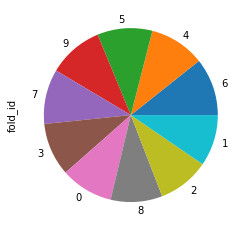

In [7]:
fig, ax = plt.subplots()
df['fold_id'].value_counts().plot(ax=ax, kind='pie')
plt.show()

I am confident in assuming that this is a subgrouping id. 

### CV tag
I can't imagine what this means. Probably it's also a kind of grouping let's see what kind of different values there are.

In [8]:
df.cv_tag.unique()

array(['cv000', 'cv001', 'cv002', 'cv003', 'cv004', 'cv005', 'cv006',
       'cv007', 'cv008', 'cv009', 'cv010', 'cv011', 'cv012', 'cv013',
       'cv014', 'cv015', 'cv016', 'cv017', 'cv018', 'cv019', 'cv020',
       'cv021', 'cv022', 'cv023', 'cv024', 'cv025', 'cv026', 'cv027',
       'cv028', 'cv029', 'cv030', 'cv031', 'cv032', 'cv033', 'cv034',
       'cv035', 'cv036', 'cv037', 'cv038', 'cv039', 'cv040', 'cv041',
       'cv042', 'cv043', 'cv044', 'cv045', 'cv046', 'cv047', 'cv048',
       'cv049', 'cv050', 'cv051', 'cv052', 'cv053', 'cv054', 'cv055',
       'cv056', 'cv057', 'cv058', 'cv059', 'cv060', 'cv061', 'cv062',
       'cv063', 'cv064', 'cv065', 'cv066', 'cv067', 'cv068', 'cv069',
       'cv070', 'cv071', 'cv072', 'cv073', 'cv074', 'cv075', 'cv076',
       'cv077', 'cv078', 'cv079', 'cv080', 'cv081', 'cv082', 'cv083',
       'cv084', 'cv085', 'cv086', 'cv087', 'cv088', 'cv089', 'cv090',
       'cv091', 'cv092', 'cv093', 'cv094', 'cv095', 'cv096', 'cv097',
       'cv098', 'cv0

It's just a number from 0 to 999 with `cv` in front of it. Let's replace this with just the number. That way we can plot it easier. 

In [9]:
#clean out 'cv'
df['cv_tag'] = df['cv_tag'].str.replace("cv", "")
#change to numeric type
df['cv_tag'] = pd.to_numeric(df['cv_tag'])

I still feel at this point that this is a grouping. Let's see how it looks in a graph.

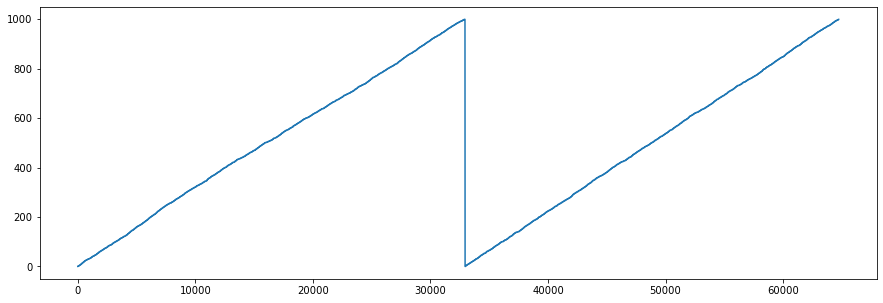

In [10]:
fig, axs = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(15)

df['cv_tag'].plot(ax=axs, kind='line')
plt.show()

It continues to add up over the length of the data. This happens twice. And there are also 2 types of tags positive and negative. This is probably related to each other. Perhaps a zoomed-in small piece will give more insight. 


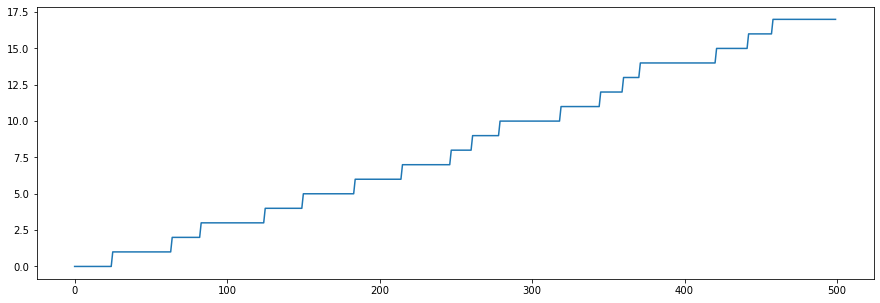

In [11]:
fig, axs = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(15)

df['cv_tag'][:500].plot(ax=axs, kind='line')
plt.show()

The values seem to be divided into blocks. That's all I can see about it at the moment.

### HTML id
Html is a language in which websites are created. But whether this is related to this dataset? Let's start by looking at what different values there are.

In [12]:
print(sorted(df.html_id.unique()))

[42, 49, 50, 57, 74, 150, 984, 1198, 1250, 1381, 1576, 1730, 1754, 1841, 1941, 1989, 2029, 2053, 2068, 2107, 2145, 2230, 2253, 2269, 2287, 2389, 2396, 2450, 2556, 2618, 2666, 2673, 2693, 2695, 2856, 2877, 2895, 2915, 2953, 3006, 3087, 3092, 3108, 3193, 3257, 3343, 3367, 3385, 3416, 3421, 3515, 3541, 3675, 3793, 3832, 3903, 3954, 3967, 3968, 3977, 4041, 4101, 4111, 4122, 4136, 4230, 4264, 4295, 4348, 4365, 4367, 4389, 4471, 4526, 4659, 4719, 4776, 4782, 4876, 4938, 4967, 4968, 4978, 4992, 5006, 5007, 5009, 5010, 5012, 5016, 5043, 5045, 5046, 5054, 5063, 5079, 5088, 5090, 5107, 5108, 5126, 5137, 5152, 5164, 5168, 5179, 5221, 5262, 5297, 5301, 5306, 5311, 5312, 5338, 5358, 5367, 5376, 5378, 5380, 5383, 5389, 5393, 5396, 5414, 5416, 5418, 5423, 5425, 5450, 5461, 5524, 5562, 5578, 5581, 5583, 5618, 5619, 5622, 5626, 5627, 5641, 5644, 5649, 5674, 5682, 5702, 5710, 5713, 5754, 5778, 5788, 5792, 5793, 5794, 5806, 5866, 5870, 5873, 5928, 5947, 5963, 5964, 5972, 6014, 6021, 6027, 6035, 6079, 616

There are very many different values. Maybe a histogram or a line diagram will give you more insight. 

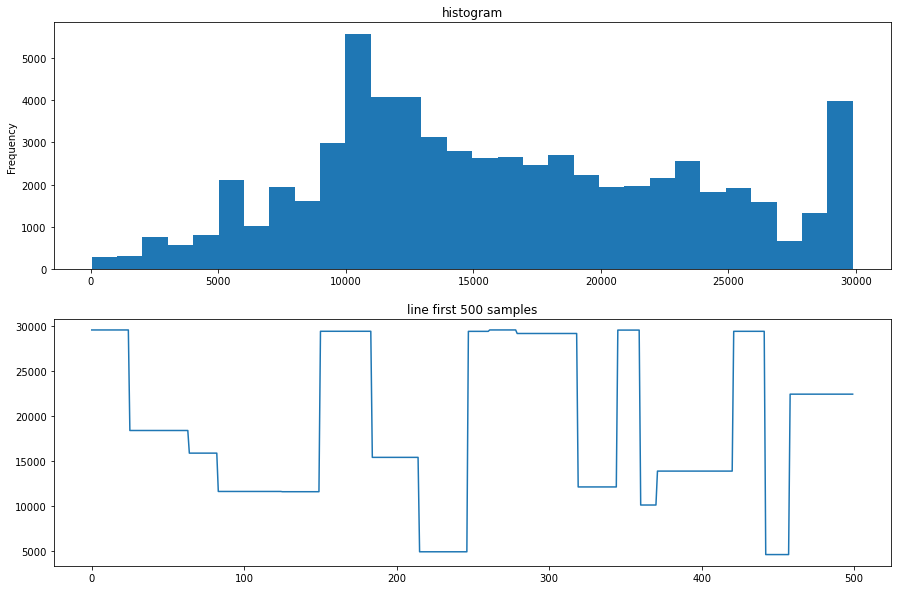

In [13]:
fig, axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(15)

df['html_id'].plot(ax=axs[0], kind='hist',bins=30, title="histogram")
df['html_id'][:500].plot(ax=axs[1], kind='line', title= "line first 500 samples")
plt.show()

You can see that ids between 10,000 and 15,000, and just under 30,000 are more common than other ids. In the line graph, you can see that this data also appears to be divided into blocks, but so there is no smooth flow to be seen. Other than that, I can't get much information from this about what this column is about.   
  
I suspect that this dataset was scrapped from the web and that this column refers to an html element or something like that. I cannot confirm this.

### Sent id
Sending can refer to many things. But if we keep the scraping scenario in mind, it might have to do with sending the scraped data. Let's also put this data into a histogram and into a line diagram. 

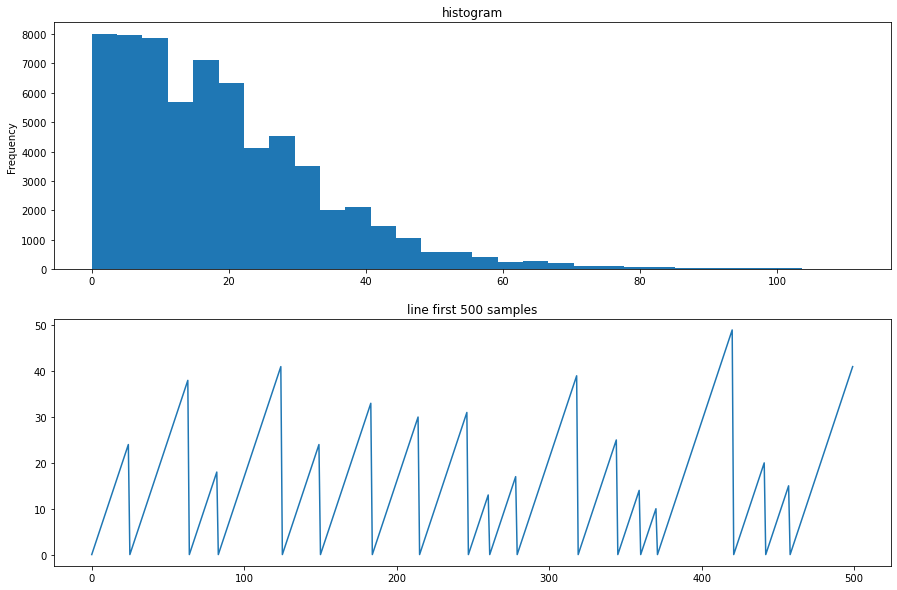

In [14]:
fig, axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(15)

df['sent_id'].plot(ax=axs[0], kind='hist',bins=30, title="histogram")
df['sent_id'][:500].plot(ax=axs[1], kind='line', title= "line first 500 samples")
plt.show()

The lower the number the more common it is. That is one conclusion we can draw from the histogram. This can also be explained if we look at the line diagram. It is always counted from zero upwards. Again, we see that the data seems to be divided into blocks. 

### Column information 

Note: This is an assumption, actual information is not available. 

|Column name|Description|Data Type|
|---|---|---|
| fold_id | part (fold) index of data | int | 
| cv_tag | ? | int | 
| html_id | id of the html element data was scraped from | int | 
| sent_id | id of the message sended with | int |
| text | The text of the review | object |
| tag | The sentiment tag (positive or negative) | object |

### Data blocks
To see if the data is distributed in the same blocks we are going to put the data in the same graph. For this we need to normalize the data. for this we create a function. 

In [15]:
def normalise(series):
    mini = min(series)
    maxi = max(series)
    normalised = (series - mini) / (maxi - mini)
    return normalised;

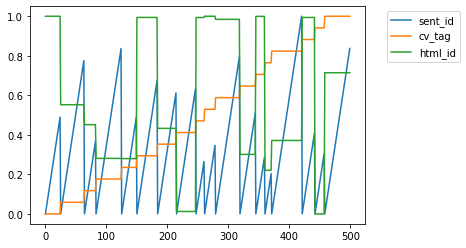

In [16]:
fig, ax = plt.subplots()

sent_id = df['sent_id'][:500]
normalise(sent_id).plot(ax=ax, kind='line')

cv_tag = df['cv_tag'][:500]
normalise(cv_tag).plot(ax=ax, kind='line')

html = df['html_id'][:500]
normalise(html).plot(ax=ax, kind='line')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

The data is indeed divided into the same blocks. What this means I do not know. I assume this has something to do with scrapping. This data does not seem interesting for the project so let's look further into `tag` and `text`.

### Column information 

|Column name|Description|Data Type|
|---|---|---|
| overall | the overal score a product  | float | 
| vote | helpfull votes of review | float | 
| verified | reviewer verified state | bool | 
| reviewTime | date of the review | datetime |
| reviewerID | The ID of the reviewer | object |
| asin | The ID of the product | object |
| reviewerName | The name of the reviewer | object |
| summary | The summary of the review | object |
| unixReviewTime | date of the review in unix format | int |
| style | A summary of product specifications, e.g., "Color" or "Size" | object |
| image | Images the reviewer uploaded after recieving the product | object |  




## Tag and Text
We are going to start by renaming the columns so that they are the same in each data frame

In [17]:
df = df.rename(columns = {'text': 'reviewText', 'tag': 'sentiment'}, inplace = False)
df = df.filter(['reviewText' , 'sentiment'], axis=1)
df

reviewText sentiment
0      films adapted from comic books have had plenty...       pos
1      for starters , it was created by alan moore ( ...       pos
2      to say moore and campbell thoroughly researche...       pos
3      the book ( or " graphic novel , " if you will ...       pos
4      in other words , don't dismiss this film becau...       pos
...                                                  ...       ...
64715  that lack of inspiration can be traced back to...       neg
64716  like too many of the skits on the current inca...       neg
64717  after watching one of the " roxbury " skits on...       neg
64718   bump unsuspecting women , and . . . that's all .       neg
64719  after watching _a_night_at_the_roxbury_ , you'...       neg

[64720 rows x 2 columns]

The column names are now correct. But we change the values of sentiment so that they are the same in each file. 

In [18]:
df['sentiment'] = df['sentiment'].replace('pos', 'POSITIVE')
df['sentiment'] = df['sentiment'].replace('neg', 'NEGATIVE')
df

reviewText sentiment
0      films adapted from comic books have had plenty...  POSITIVE
1      for starters , it was created by alan moore ( ...  POSITIVE
2      to say moore and campbell thoroughly researche...  POSITIVE
3      the book ( or " graphic novel , " if you will ...  POSITIVE
4      in other words , don't dismiss this film becau...  POSITIVE
...                                                  ...       ...
64715  that lack of inspiration can be traced back to...  NEGATIVE
64716  like too many of the skits on the current inca...  NEGATIVE
64717  after watching one of the " roxbury " skits on...  NEGATIVE
64718   bump unsuspecting women , and . . . that's all .  NEGATIVE
64719  after watching _a_night_at_the_roxbury_ , you'...  NEGATIVE

[64720 rows x 2 columns]

# Conclusion
I now have a better understanding of the data in the dataset. I have filtered for what is useful and added a sentiment column. I feel confident that I can use this data in the next step. 

### Save DF
We are done with filtering and exploring the data of this dataset. Now we save it so it can be used in another file.

In [19]:
#save dataframe as csv to use it in another file
df.to_csv(r'data/filtered/movie_filtered.csv', index = False)